In [92]:
!pip install micrograd
from micrograd.engine import Value

Defaulting to user installation because normal site-packages is not writeable


In [93]:
a=Value(-4.0)
b=Value(2.0)

In [94]:
c= a+b
d=a*b+b**3
c+=c+1
c+=1+c+(-a)
d+=d*2+(b+a).relu()
d+=3*d+(b-a).relu()
e=c-d
f=e**2
g=f/2.0
g+=10.0/f
print(f'{g.data:.4f}')
g.backward()
print(f'{a.grad:.4f}')
print(f'{b.grad:.4f}')

24.7041
138.8338
645.5773


In [144]:
!pip install matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [96]:
def f(x):
    return 3*x**2-4*x+5
f(3.0)

20.0

In [97]:
h=0.000001
x=2/3
(f(x+h)-f(x))/h

2.999378523327323e-06

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75] [100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


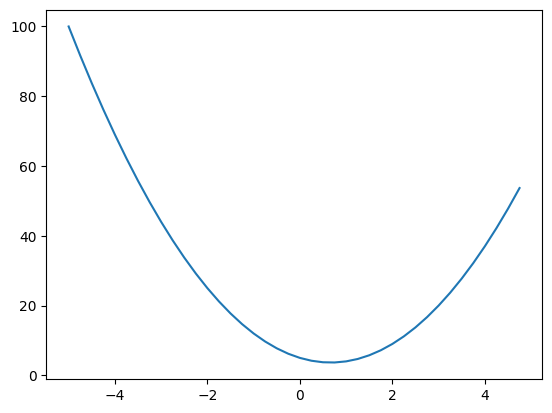

In [98]:
xs=np.arange(-5,5,0.25)
ys=f(xs)
print(xs, ys)
print(plt.plot(xs,ys))

In [99]:
h=0.0001
((f(xs+h)-f(xs))/h)

array([-33.9997, -32.4997, -30.9997, -29.4997, -27.9997, -26.4997,
       -24.9997, -23.4997, -21.9997, -20.4997, -18.9997, -17.4997,
       -15.9997, -14.4997, -12.9997, -11.4997,  -9.9997,  -8.4997,
        -6.9997,  -5.4997,  -3.9997,  -2.4997,  -0.9997,   0.5003,
         2.0003,   3.5003,   5.0003,   6.5003,   8.0003,   9.5003,
        11.0003,  12.5003,  14.0003,  15.5003,  17.0003,  18.5003,
        20.0003,  21.5003,  23.0003,  24.5003])

In [100]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [101]:
a=2.0
b=-3.0
c=10.0
d1=a*b+c
print(d)

h=0.0001

a=2.0+h
b=-3.0
c=10.0
d2=a*b+c

print('slope:',(d2-d1)/h)


4.0
slope: -3.000000000010772


In [12]:
#Steps to draw an expression graph for the above expression
#step 1: define the function(draw_dot) to draw the graph from root of the trace function
#step 2: create a left to right graph
#step 3: get nodes and edges from the trace function
#step 4: for the node in the nodes, ----(create a for loop)
#step 5: create a unique id (uid) for each node in the 'string format'
#step 6: a) after giving it a unique id, 
#        b) we add a node to the graph 
#        c) Then we name it and 'show it' with the ('data value', 'label',(along with a format for data and label)) give it a 'shape'.
#step 7: now, if the above node was created using an operation(eg: '+','-' etc.)---(write an if condition)
#step 8: create a node for this operation as well, by giving it a 'name' and 'label' it with the 'operation'(symbol)
#step 9: Now, we draw an edge from the operation node to the result node('uid' if the above condition in step:7 is true)
#step 10: Create a for loop out of the above for loop
#step 11: Create an edge inside the forloop between the predecessor node and the operation of the result node
#step 12: Return the graph object
#step 13: call the draw_dot function draw_dot()

In [133]:
class Value:
    def __init__(self,data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward=lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),'+') 
        def _backward():
            self.grad=1.0*out.grad
            other.grad=1.0*out.grad
        out._backward=_backward
        return out
    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad=other.data*out.grad
            other.grad=self.data*out.grad
        out._backward=_backward
        return out
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t, (self, ), 'tanh')
        def _backward():
            self.grad=(1-t**2)*out.grad
        out._backward=_backward
        return out
a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b;e.label='e'
d=e+c;d.label='d'
f=Value(-2.0,label='f')
L=d*f;L.label='L'

In [103]:
!pip install graphviz
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)'
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

Defaulting to user installation because normal site-packages is not writeable


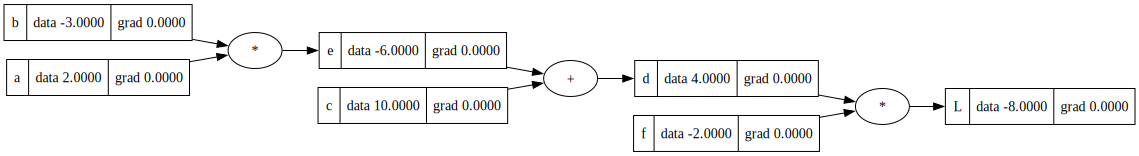

In [104]:
def draw_dot(root):
    dot=Digraph(format='svg',graph_attr=({'rankdir':'LR'}))
    nodes, edges= trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid,label="{%s | data % .4f | grad % .4f}"%(n.label,n.data,n.grad), shape='record')
        if n._op:
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot
    
draw_dot(L)


In [105]:
L.grad=1
f.grad=4
d.grad=-2
e.grad=-2
c.grad=-2
b.grad=-4
a.grad=6

In [106]:
def lol():
    h=0.0001
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b;e.label='e'
    d=e+c;d.label='d'
    f=Value(-2.0,label='f')
    L=d*f;L.label='L'
    L1=L.data
    
    a=Value(2.0+h,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b;e.label='e'
    d=e+c;d.label='d'
    f=Value(-2.0,label='f')
    L=d*f;L.label='L'
    L2=L.data
    print((L2-L1)/h)

lol()

6.000000000021544


In [107]:
a.data+=0.001*a.grad
b.data+=0.001*b.grad
c.data+=0.001*c.grad
f.data+=0.001*f.grad

e=a*b
d=e+c
L=d*f
print(L.data)

-7.928064095999999


In [134]:
#Building a neuron
#Define the inputs
x1=Value(2.0, label='x1')
x2=Value(0.0, label='x2')
#Define the weights
w1=Value(-3.0, label='w1')
w2=Value(1.0, label='w2')
#Define the bias
b=Value(6.88137, label='b')
#product of the inputs with their corresponding weights
x1w1=x1*w1; x1w1.label='x1w1'
x2w2=x2*w2; x2w2.label='x2w2'
#sum of these products
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label='x1w1+x2w2'
#Add bias to this sum
n=x1w1x2w2+b; n.label='n'
#pass this whole sum through the activation fucntion (tanh) in the current example
o=n.tanh(); o.label='o'

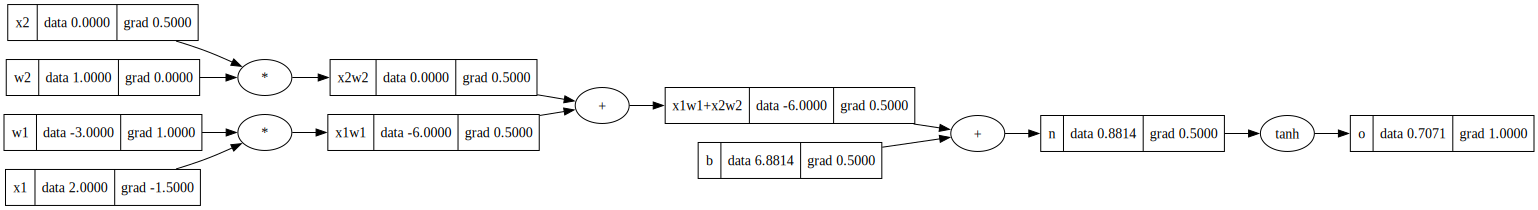

In [154]:
draw_dot(o)

In [153]:
topo=[] #create a list called topo
visited= set() #create a set called visited
def build_topo(v): #build a function to traverse from the node v
    if v not in visited: #if v is not yet visited
        visited.add(v) #add v to the set visited 
        for child in v._prev: #visit all the childs of this node v
            build_topo(child) #Then traverse the child nodes 
        topo.append(v) #Append each visited node to the list topo
build_topo(o) #Call the recursive function to start traversing from 'o'

for nodes in reversed(topo): # for the nodes in the list topo, in the revese direction,
    node._backward() #implement back propagation

In [152]:
topo=[]
visited=set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo    

[Value(data=6.88137),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813700000000004),
 Value(data=0.7071049876722272)]

In [141]:
o.grad=1.0
o._backward()
n._backward()
x1w1x2w2._backward()
b._backward()
x1w1._backward()
x2w2._backward()
x1._backward()
w1._backward()
x2._backward()
w2._backward()

In [126]:
#Implementing Backpropagation Manually
#Gradient w.r.t 'o'
o.grad=1.0
#Gradient w.r.t 'n'
n.grad=1-(o.data)**2
#Gradient w.r.t 'b'
b.grad=1.0*n.grad
#Gradient w.r.t 'x1w1x2w2'
x1w1x2w2.grad=1.0*n.grad
#Gradient w.r.t 'x1w1'
x1w1.grad=1.0*x1w1x2w2.grad
#Gradient w.r.t 'x2w2'
x2w2.grad=1.0*x2w2.grad
#Gradient w.r.t 'x1'
x1.grad=w1.data*x1w1.grad
#Gradient w.r.t 'w1'
w1.grad=x1.data*x2w2.grad
#Gradient w.r.t 'x2'
x2.grad=w2.data*x2w2.grad
#Gradient w.r.t 'w2'
w2.grad=x2.data*x2w2.grad